In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.interpolate import UnivariateSpline
from numpy.polynomial import Polynomial
from scipy.optimize import minimize


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14

In [27]:
data_hv = pd.read_csv("data_hv.csv")
data_lv = pd.read_csv("data_lv.csv")

[7.00022635]
[2.36049132]
[7.03791124]
[2.3882996]


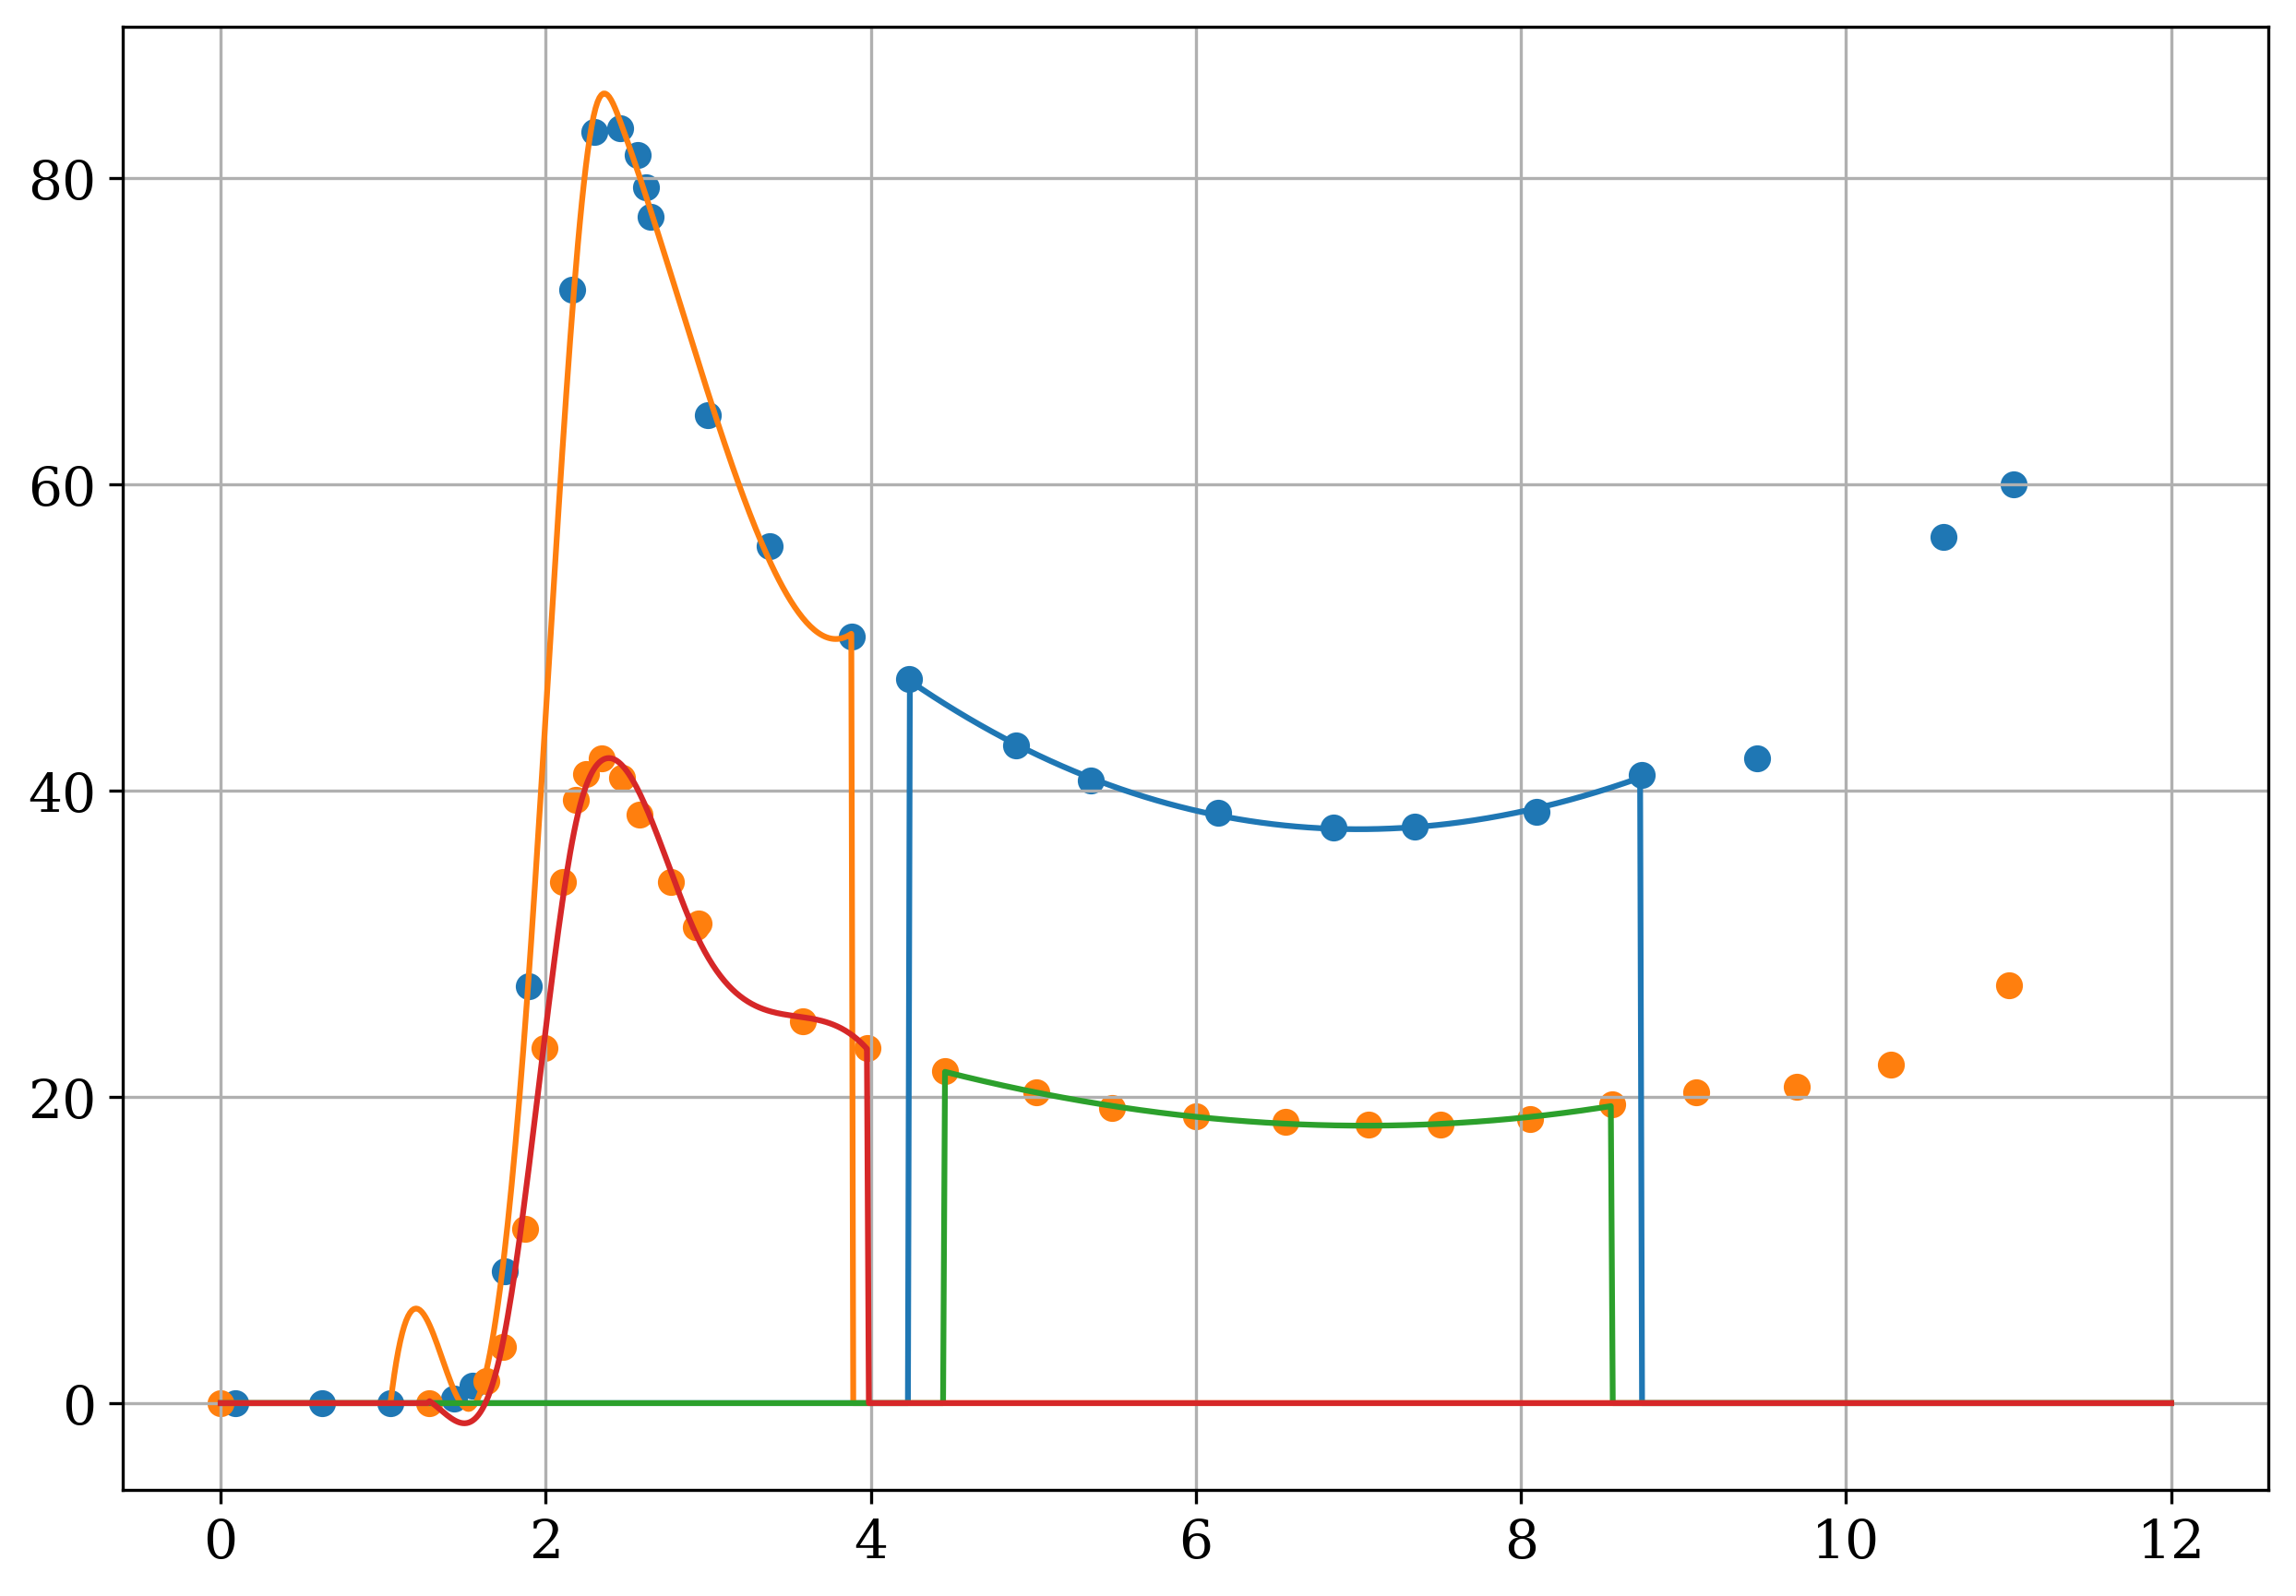

In [112]:
x, y = data_hv.U, data_hv.I
plt.scatter(x, y)

xl = np.linspace(0, 12, 1000)

l, r = 4, 9
s_1 = UnivariateSpline(x[(x > l) * (x < r)], y[(x > l) * (x < r)], ext=1)
a_1 = minimize(s_1, 6)
print(a_1.x)
plt.plot(xl, s_1(xl))

l, r = 1, 4
s_2 = UnivariateSpline(x[(x > l) * (x < r)], y[(x > l) * (x < r)], ext=1)
a_2 = minimize(lambda x: -s_2(x), 3)
print(a_2.x)
plt.plot(xl, s_2(xl))

x, y = data_lv.U, data_lv.I
plt.scatter(x, y)

l, r = 4, 9
s_3 = UnivariateSpline(x[(x > l) * (x < r)], y[(x > l) * (x < r)], ext=1)
a_3 = minimize(s_3, 6)
print(a_3.x)
plt.plot(xl, s_3(xl))

l, r = 1, 4
s_4 = UnivariateSpline(x[(x > l) * (x < r)], y[(x > l) * (x < r)], ext=1)
a_4 = minimize(lambda x: -s_4(x), 3)
print(a_4.x)
plt.plot(xl, s_4(xl))

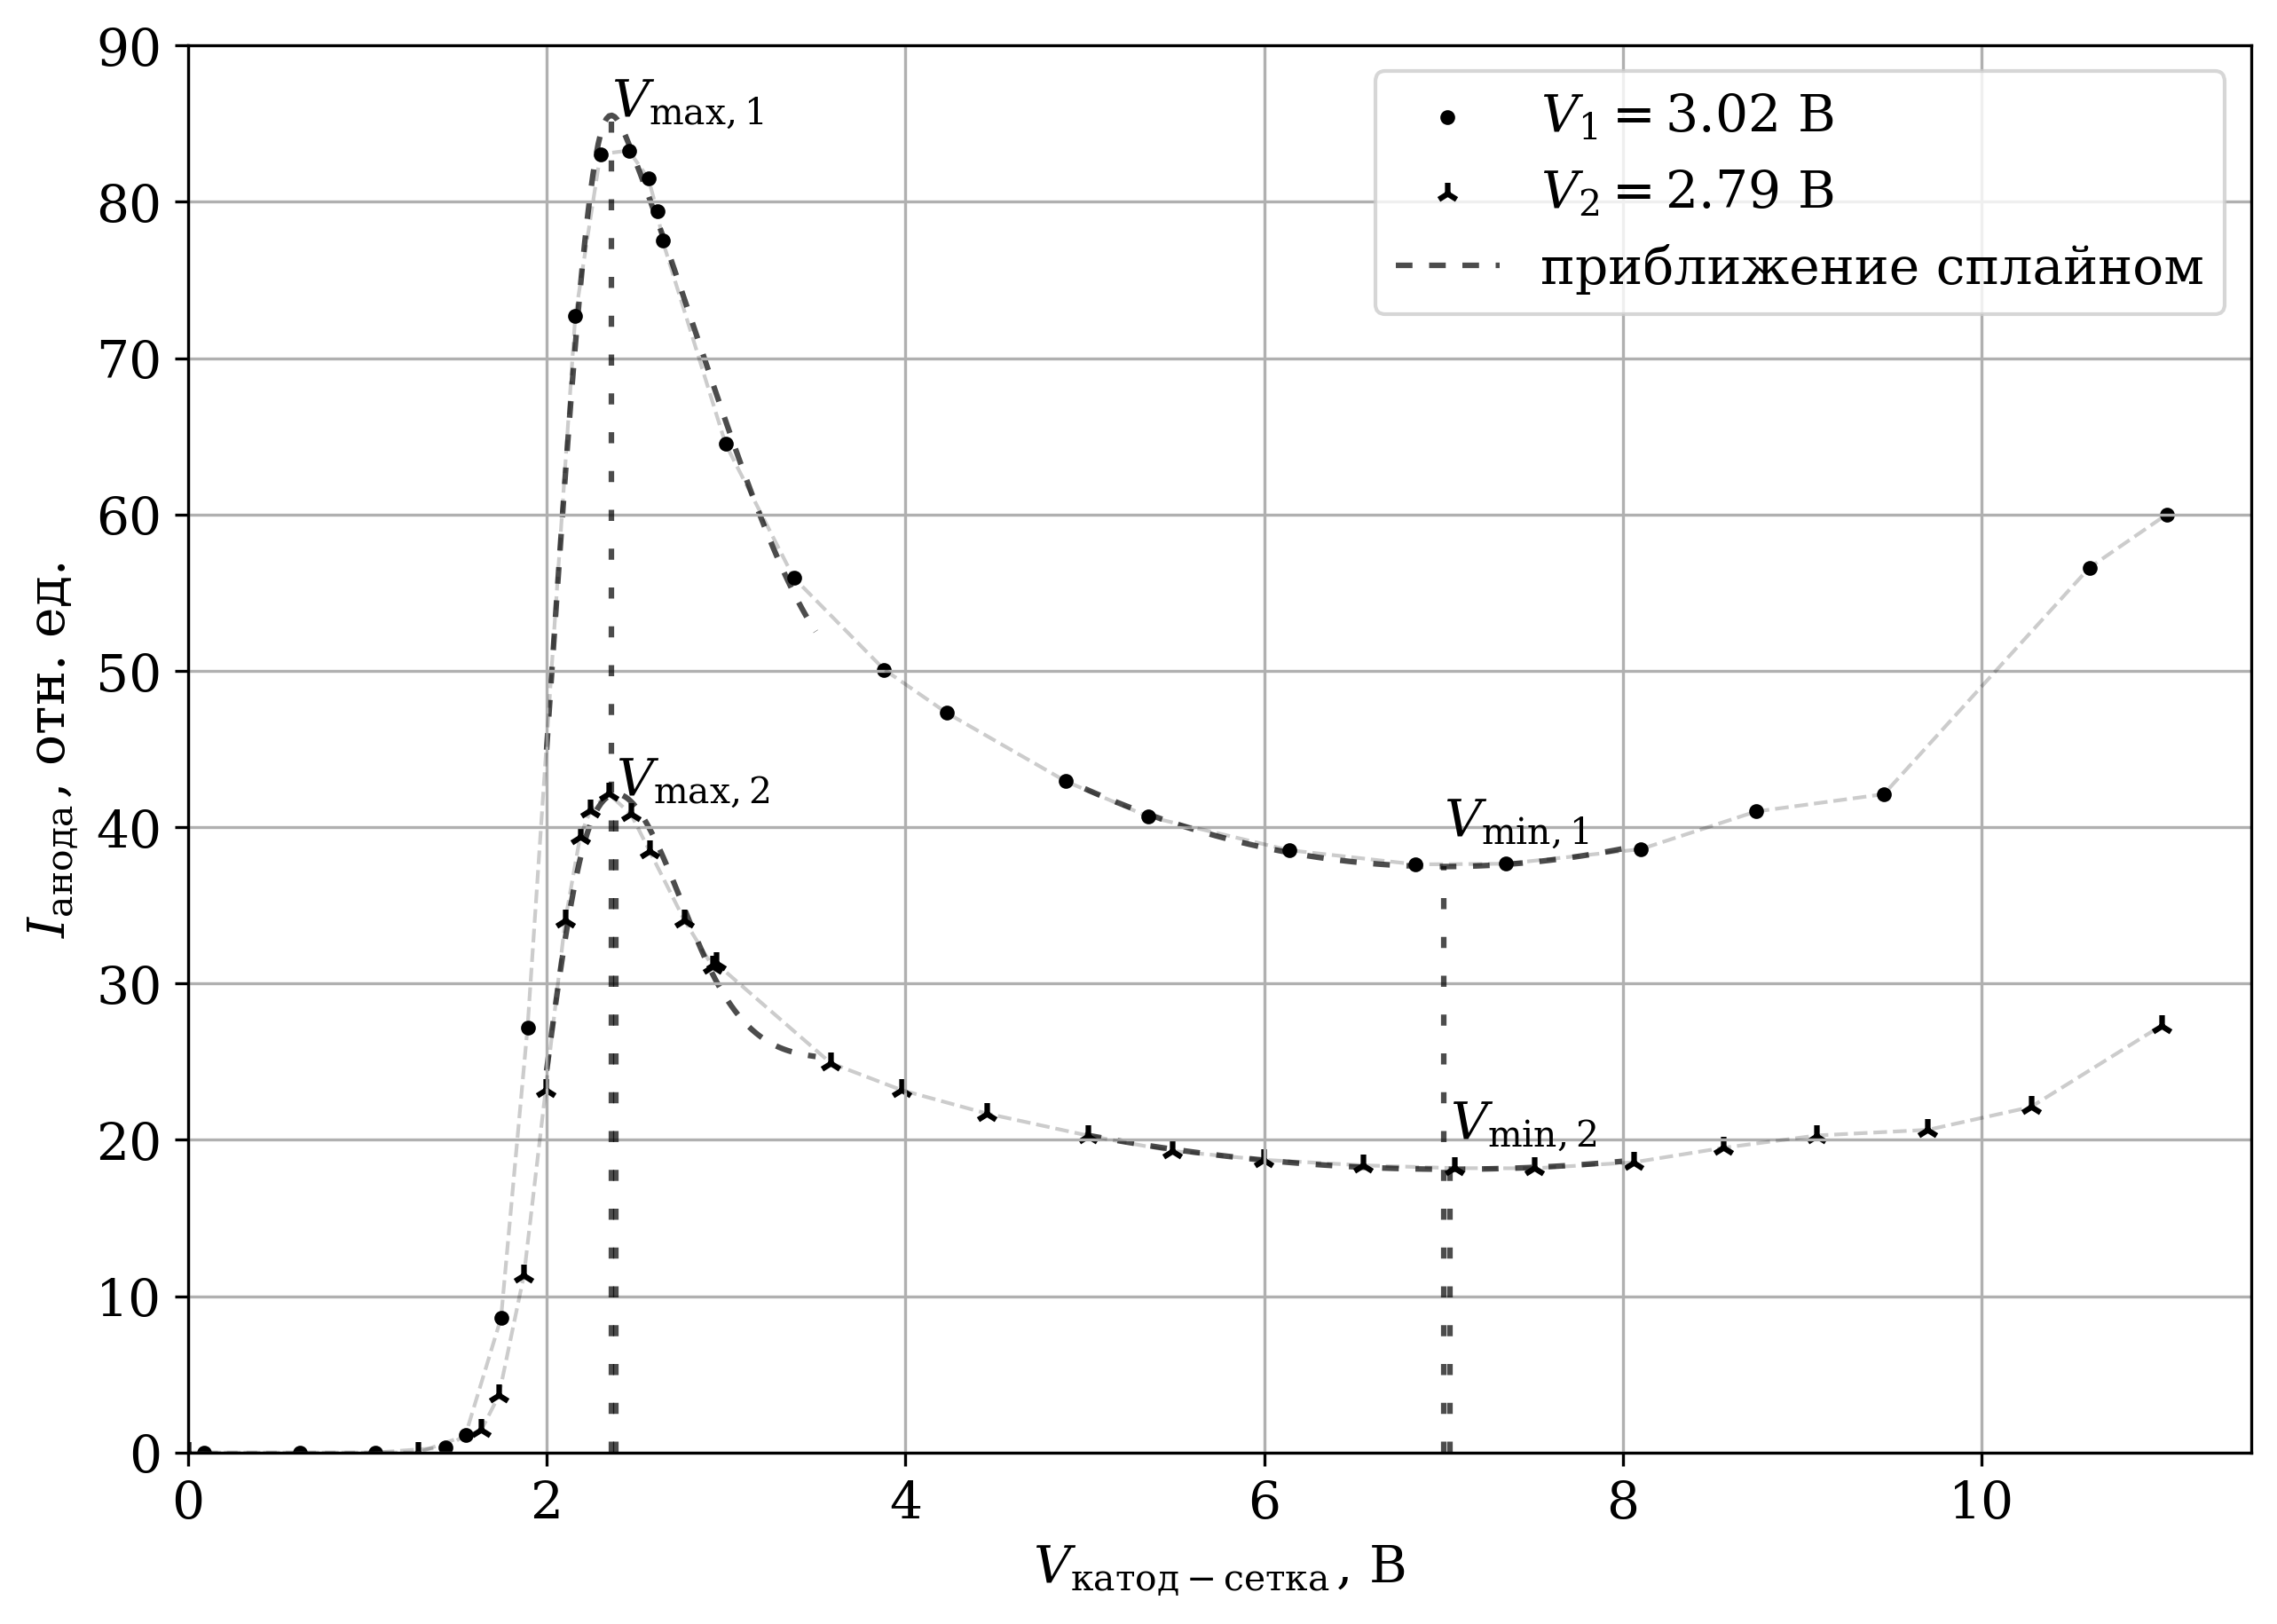

In [147]:
plt.scatter(data_hv.U, data_hv.I, label="$V_1 = 3.02$ В", marker=".", color="black")
plt.scatter(data_lv.U, data_lv.I, label="$V_2 = 2.79$ В", marker="2", color="black")
plt.plot(data_hv.U, data_hv.I, color="black", ls="--", alpha=0.2, lw=1)
plt.plot(data_lv.U, data_lv.I, color="black", ls="--", alpha=0.2, lw=1)

x_max = np.linspace(2, 3.5, 100)
plt.plot(x_max, s_2(x_max), color="black", alpha=0.7, zorder=0.5, ls=(0, (3, 3)), label="приближение сплайном")
plt.plot(x_max, s_4(x_max), color="black", alpha=0.7, zorder=0.5, ls=(0, (3, 3)))

x_min = np.linspace(5, 8, 100)
plt.plot(x_min, s_1(x_min), color="black", alpha=0.7, zorder=0.5, ls=(0, (3, 3)))
plt.plot(x_min, s_3(x_min), color="black", alpha=0.7, zorder=0.5, ls=(0, (3, 3)))

plt.plot([a_2.x[0], a_2.x[0]], [0, s_2(a_2.x[0])], ls=(0, (2, 5)), color="black", alpha=0.7)
plt.text(a_2.x[0], s_2(a_2.x[0]), r"$V_{\max, 1}$")
plt.plot([a_1.x[0], a_1.x[0]], [0, s_1(a_1.x[0])], ls=(0, (2, 5)), color="black", alpha=0.7)
plt.text(a_1.x[0], s_1(a_1.x[0]) + 2, r"$V_{\min, 1}$")

plt.plot([a_3.x[0], a_3.x[0]], [0, s_3(a_3.x[0])], ls=(0, (2, 5)), color="black", alpha=0.7)
plt.text(a_3.x[0], s_3(a_3.x[0]) + 2, r"$V_{\min, 2}$")
plt.plot([a_4.x[0], a_4.x[0]], [0, s_4(a_4.x[0])], ls=(0, (2, 5)), color="black", alpha=0.7)
plt.text(a_4.x[0], s_4(a_4.x[0]), r"$V_{\max, 2}$")


plt.xlabel("$V_\operatorname{катод-сетка}$, В")
plt.ylabel("$I_\operatorname{анода}$, отн. ед.")

plt.xlim(0, 11.5)
plt.ylim(0, 90)

plt.legend()
plt.savefig("plot.pdf")

/home/coastal/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


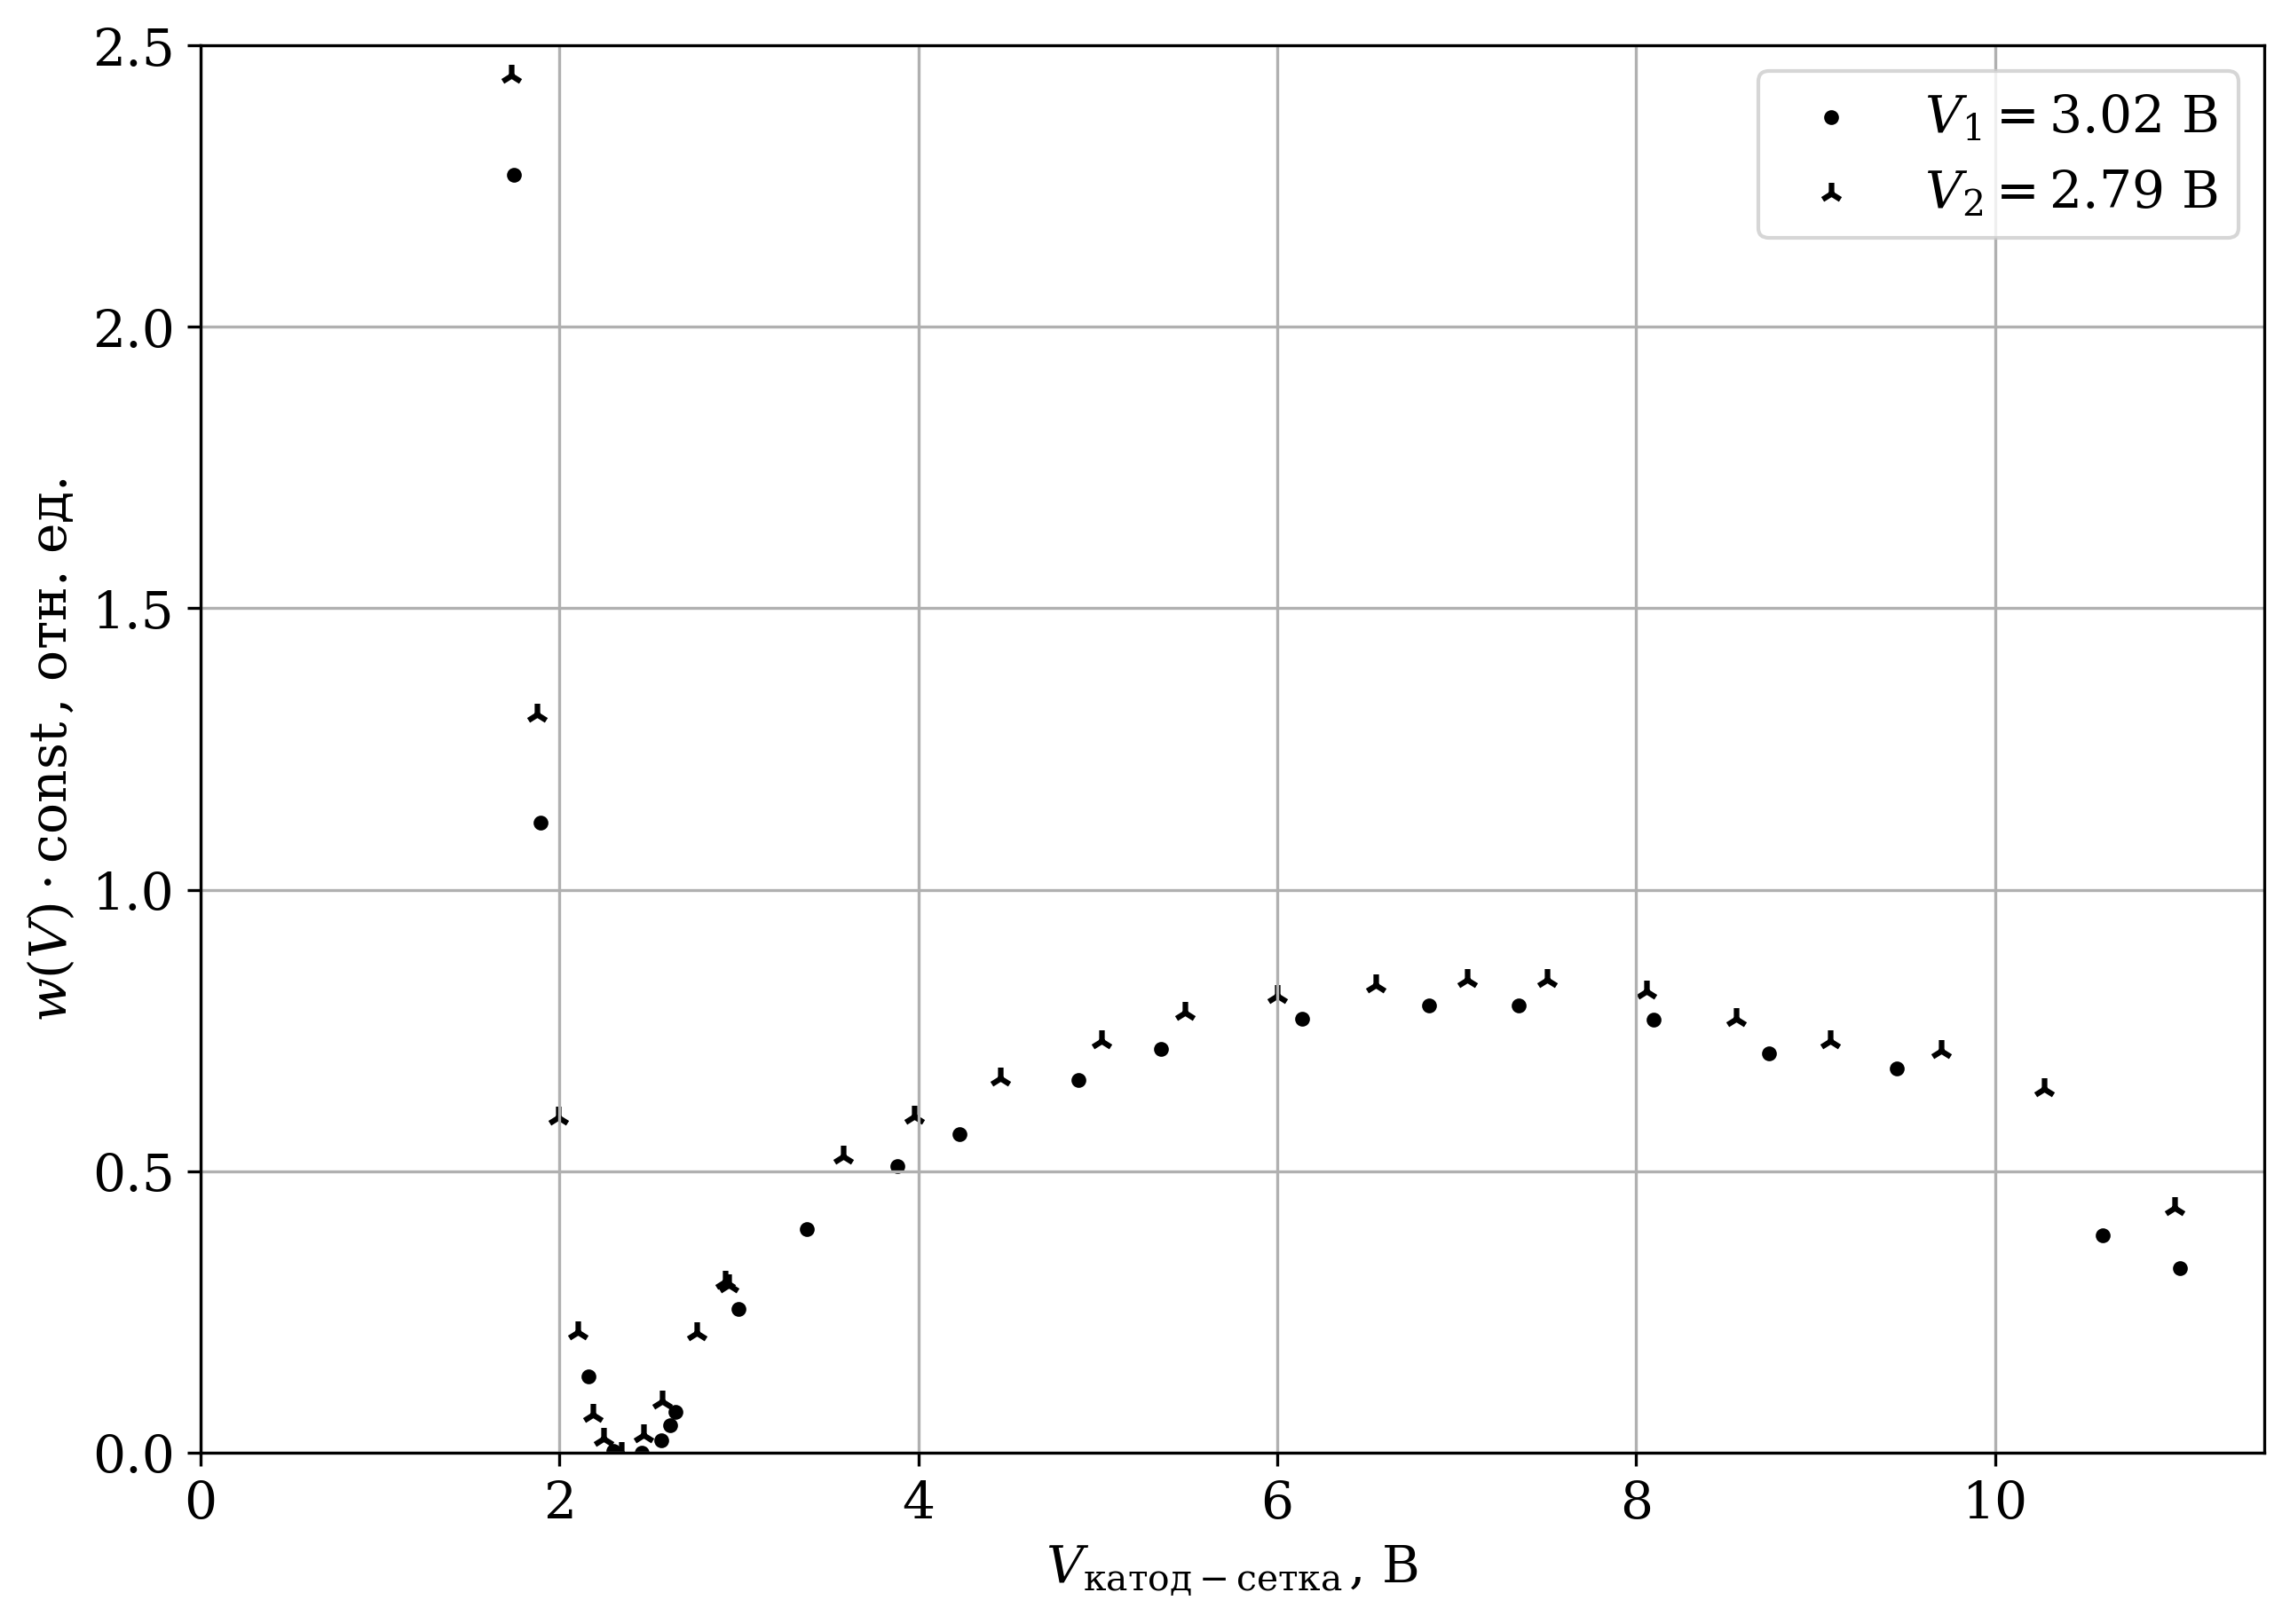

In [146]:
plt.scatter(data_hv.U, -np.log(data_hv.I/np.max(data_hv.I)), label="$V_1 = 3.02$ В", marker=".", color="black")
plt.scatter(data_lv.U, -np.log(data_lv.I/np.max(data_lv.I)), label="$V_2 = 2.79$ В", marker="2", color="black")

plt.xlabel("$V_\operatorname{катод-сетка}$, В")
plt.ylabel("$w(V) \cdot \operatorname{const}$, отн. ед.")

plt.xlim(0, 11.5)
plt.ylim(0, 2.5)

plt.legend()
plt.savefig("plot_prob.pdf")